In [33]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read initial data
file_path='rtfDataSet.csv'
df = pd.read_csv(file_path)
print(df.head())

       0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.536  0.292 -0.684  0.123 -0.118  0.346 -0.308 -0.113  0.401 -0.399  ...   
1 -0.496 -0.298 -0.529  0.073 -0.072  0.107 -0.316 -0.066 -0.168 -0.099  ...   
2  0.008 -0.031 -0.240  0.178 -0.120  0.317 -0.481  0.031 -0.077  0.063  ...   
3 -0.188 -0.180 -0.062 -0.104 -0.136 -0.061 -0.216 -0.143  0.068 -0.189  ...   
4  0.038  0.155 -0.203 -0.088 -0.084 -0.164 -0.145 -0.168  0.008  0.143  ...   

      61     62     63     64     65     66     67     68     69  label  
0 -0.135 -0.063 -0.410 -0.223 -0.599 -0.136 -0.329 -0.132 -0.266      0  
1  0.189  0.007 -0.362 -0.151 -0.338 -0.031 -0.159 -0.097 -0.131      0  
2 -0.035  0.101 -0.098 -0.172 -0.290  0.033 -0.342 -0.321 -0.238      0  
3  0.146 -0.145 -0.527 -0.292 -0.663 -0.078 -0.194 -0.151 -0.268      0  
4  0.019 -0.084  0.164 -0.165 -0.126 -0.112  0.029 -0.138  0.148      1  

[5 rows x 71 columns]


In [3]:
#Reduce to sets and normalized
set_1=[1, 5, 10, 13, 14, 16, 17, 19, 25, 26, 29, 30, 36, 46, 51, 57]
set_2=[2, 5, 9, 10, 16, 21, 28, 34, 38, 48, 49, 55, 61, 62, 64]
set_3=[1, 2, 7, 8, 9, 10, 19, 23, 28, 34, 35, 36, 42, 44, 45, 47, 48, 49, 53, 55, 56, 57, 58, 63, 64, 65, 67]
set_4=[2, 3, 12, 16, 21, 23, 28, 34, 35, 45, 48, 50, 53, 61]
set_5=[2, 10, 11, 12, 14, 22, 36, 41, 46, 50, 55, 56, 57, 58, 65]

reduced_df_1=df.iloc[:,set_1]
reduced_df_2=df.iloc[:,set_2]
reduced_df_3=df.iloc[:,set_3]
reduced_df_4=df.iloc[:,set_4]
reduced_df_5=df.iloc[:,set_5]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
reduced_df_1 = scaler.fit_transform(reduced_df_1)
reduced_df_2 = scaler.fit_transform(reduced_df_2)
reduced_df_3 = scaler.fit_transform(reduced_df_3)
reduced_df_4 = scaler.fit_transform(reduced_df_4)
reduced_df_5 = scaler.fit_transform(reduced_df_5)

In [4]:
#Array of sets
reduced_array=[reduced_df_1,reduced_df_2,reduced_df_3,reduced_df_4,reduced_df_5]

In [8]:
#Creacion dinamica de folds y clasificacion y metricas
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
counter=1
print("Naive Bayes")
for X in reduced_array:
    print("Set: ",counter)
    mean_accuracy_nb=0
    mean_precision_nb=0
    mean_recall_nb=0
    for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
        X_train,X_val=X[train_index],X[val_index]
        y_train,y_val=y[train_index],y[val_index]

        #Naive Bayes
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred_nb = clf.predict(X_val)

        accuracy_nb = accuracy_score(y_val, y_pred_nb)
        precision_nb = precision_score(y_val, y_pred_nb)
        recall_nb = recall_score(y_val, y_pred_nb)
        #auc=roc_auc_score(y_val, y_pred) Esto no sirve falta AUC/ROC
        mean_accuracy_nb+=accuracy_nb
        mean_precision_nb+=precision_nb
        mean_recall_nb+=recall_nb

    mean_accuracy_nb=mean_accuracy_nb/10
    mean_precision_nb=mean_precision_nb/10
    mean_recall_nb=mean_recall_nb/10
    print("Mean precision: ",mean_precision_nb)
    print("Mean recall: ",mean_recall_nb)
    print("Mean accuracy: ",mean_accuracy_nb)
    counter+=1


Naive Bayes
Set:  1
Mean precision:  0.6721992481203009
Mean recall:  0.6380952380952382
Mean accuracy:  0.6539102564102566
Set:  2
Mean precision:  0.681001827885998
Mean recall:  0.727857142857143
Mean accuracy:  0.6841666666666667
Set:  3
Mean precision:  0.6901150579016712
Mean recall:  0.7228571428571428
Mean accuracy:  0.6941666666666667
Set:  4
Mean precision:  0.678145316840969
Mean recall:  0.7730952380952381
Mean accuracy:  0.6941666666666667
Set:  5
Mean precision:  0.6654375288242566
Mean recall:  0.7221428571428572
Mean accuracy:  0.6716025641025641


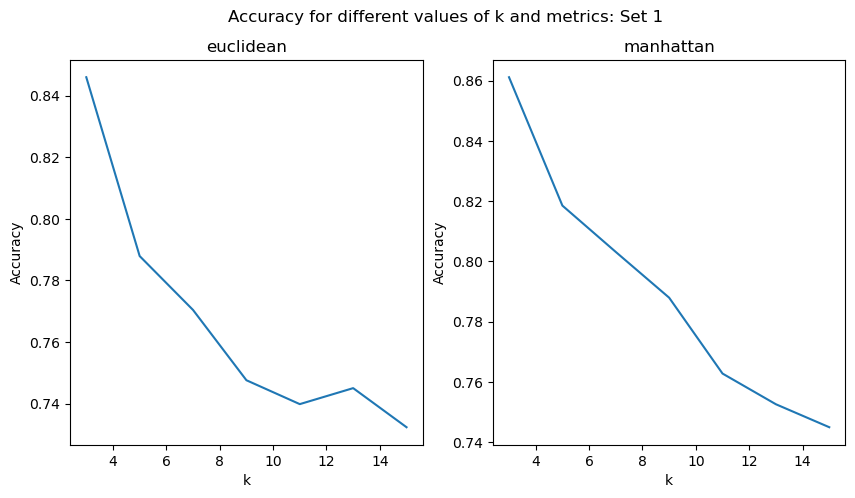

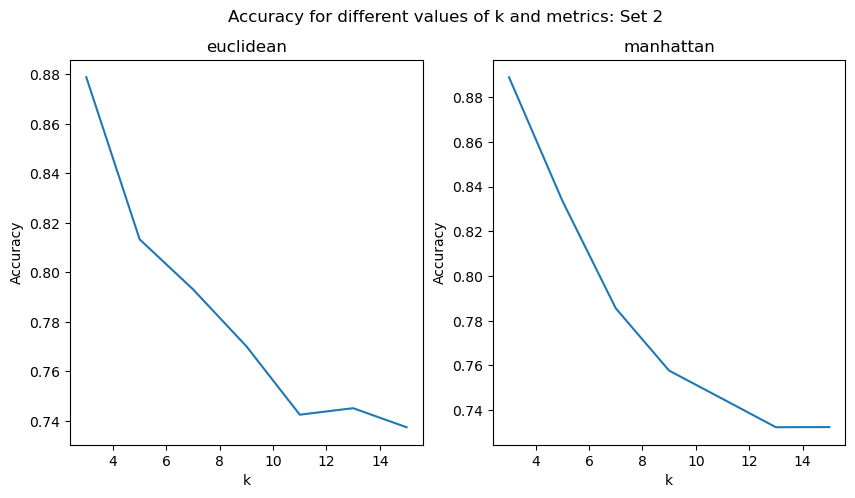

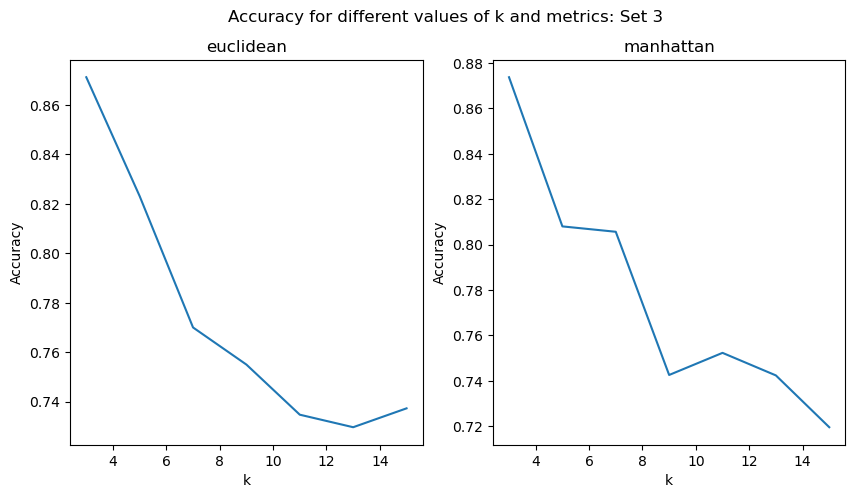

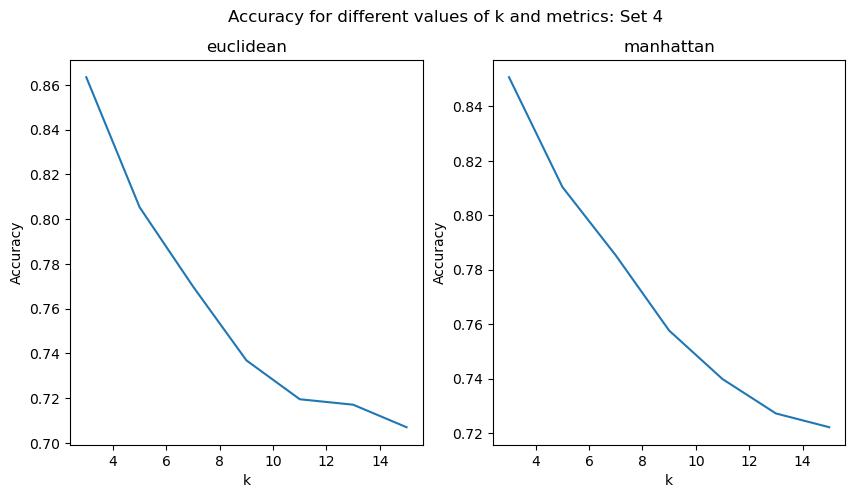

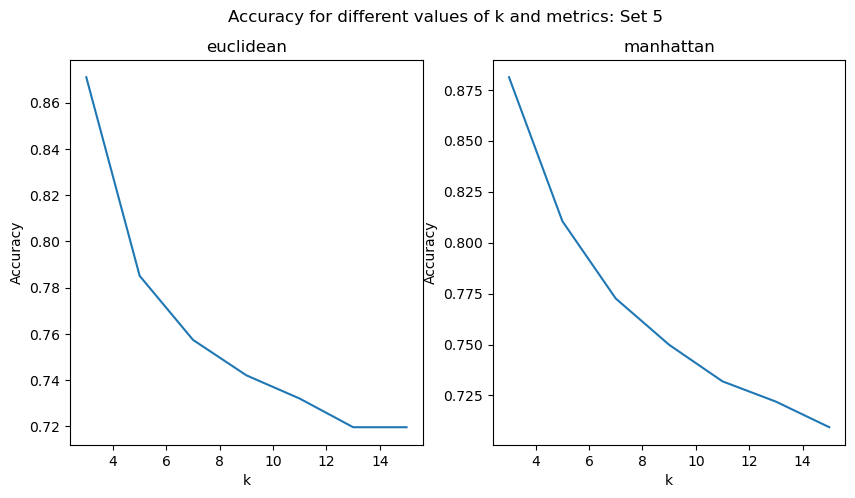

In [39]:
counter=1
for X in reduced_array:

    # Define the search space
    search_space = {
        "n_neighbors": [3,5,7,9,11,13,15],
        "metric": ["euclidean", "manhattan"]
    }

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Loop over the metrics
    for i, metric in enumerate(search_space["metric"]):
        # Create a list to store the accuracies
        accs = []
        # Loop over the values of k
        for k in search_space["n_neighbors"]:
            accs_fold=[]
            for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
                X_train,X_val=X[train_index],X[val_index]
                y_train,y_val=y[train_index],y[val_index]
                # Create a new KNN classifier with the current value of k and metric
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
                # Fit the classifier to the data
                knn.fit(X, y)
                # Make predictions on the validation set
                y_pred = knn.predict(X_val)
                # Calculate the accuracy
                acc = accuracy_score(y_val, y_pred)
                # Add the accuracy to the list
                accs_fold.append(acc)

            accs.append(sum(accs_fold)/10)
        # Plot the accuracies for the current metric
        axs[i].plot(search_space["n_neighbors"], accs)
        axs[i].set_title(metric)
        axs[i].set_xlabel("k")
        axs[i].set_ylabel("Accuracy")

        # Calcula las diferencias entre pares de puntuaciones de ACC
        #second_derivative = np.diff(np.diff(accs))                                                     
        #inflexion_points = [search_space["n_neighbors"][i + 2] for i in range(len(second_derivative) - 1) if second_derivative[i] > 0 and second_derivative[i+1]<0]
        # Encuentra el valor óptimo de k
        #best_k = inflexion_points[0]  # Puedes ajustar esto para seleccionar el punto de inflexión deseado
        #print(f'El valor óptimo de k basado en puntos de inflexión es {best_k}')
    
    fig.suptitle(f"Accuracy for different values of k and metrics: Set {counter}")
    # Show the plot
    plt.show()
    counter+=1


Set 1  
Euclidean: 9  
Manhattan: 11

Set 2  
Euclidean: 11   
Manhattan: 9   

Set 3  
Euclidean: 7   
Manhattan: 9   

Set 4  
Euclidean: 9   
Manhattan: 9   

Set 5  
Euclidean: 7  
Manhattan: 7  
